# **TB1 Pengolahan Citra**
Nama&emsp; : Dofi Saputra<br>
NIM&emsp;&ensp;&nbsp; : 41522110006

In [182]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def showBeforeAfter(img1, img2):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Image after applying the filter")
    plt.axis("off")
    plt.show()

Soal 1 ( Histogram )

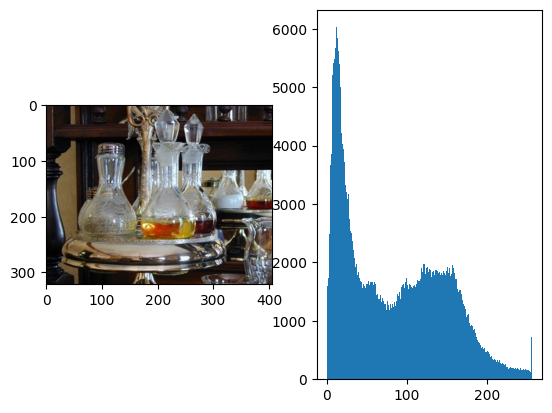

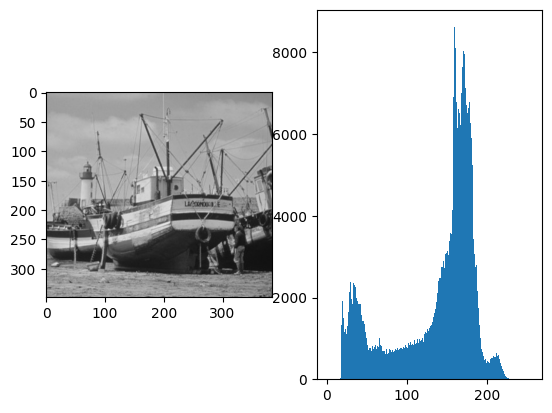

In [183]:
img_a = cv2.imread("1a.jpg")
img_b = cv2.imread("1b.jpg")

img_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_a, cmap="gray")
plt.subplot(1, 2, 2)
plt.hist(img_a.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_b, cmap="gray")
plt.subplot(1, 2, 2)
plt.hist(img_b.ravel(), 256, [0, 256])
plt.show()

Soal 2A ( Image Brightening )

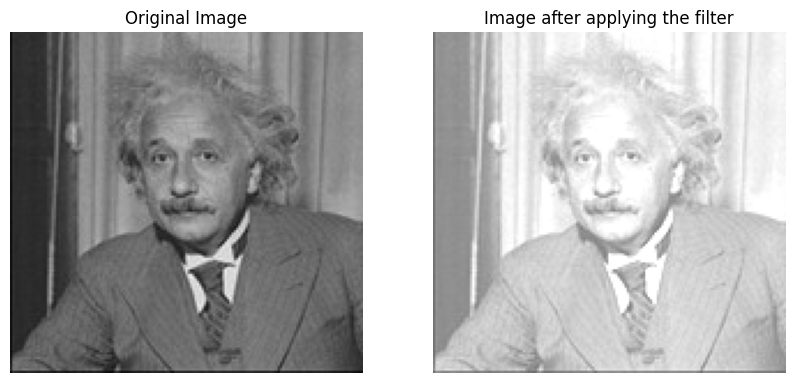

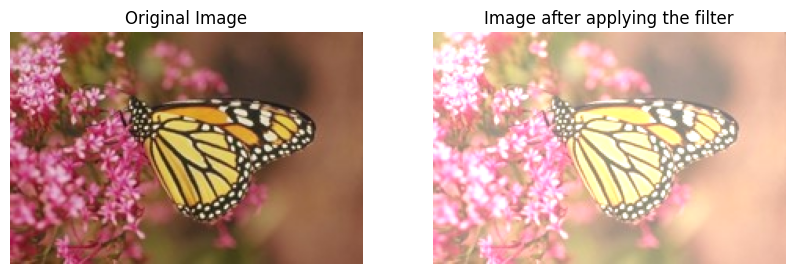

In [184]:
img_a = cv2.imread("2a.jpg")
img_b = cv2.imread("2b.jpg")

img_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

intensity_a = np.ones(img_a.shape, dtype="uint8") * 100
intensity_b = np.ones(img_b.shape, dtype="uint8") * 100

image_a_bright = cv2.add(img_a, intensity_a)
image_b_bright = cv2.add(img_b, intensity_b)

showBeforeAfter(img_a, image_a_bright)
showBeforeAfter(img_b, image_b_bright)

Soal 2B ( Operasi Konvolusi )

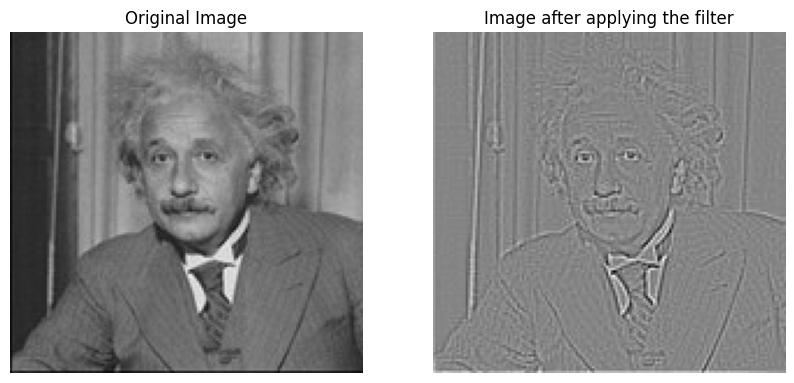

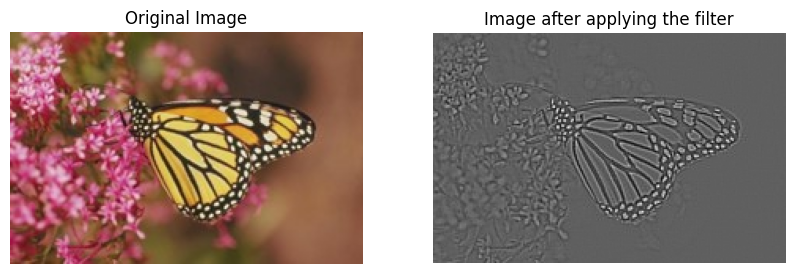

In [185]:
def convolve(image, kernel, padding=0, strides=1):
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros(
            (image.shape[0] + padding * 2, image.shape[1] + padding * 2)
        )
        imagePadded[
            int(padding) : int(-1 * padding), int(padding) : int(-1 * padding)
        ] = image
        print(imagePadded)
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (
                            kernel * imagePadded[x : x + xKernShape, y : y + yKernShape]
                        ).sum()
                except:
                    break

    return output


kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img_a_conv = convolve(img_a, kernel)
img_b_conv = convolve(img_b, kernel)

showBeforeAfter(img_a, img_a_conv)
showBeforeAfter(img_b, img_b_conv)

Soal 2C ( Operasi Rotasi )

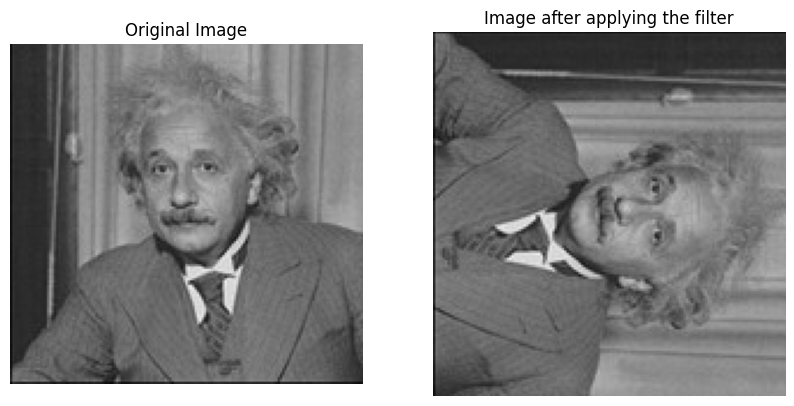

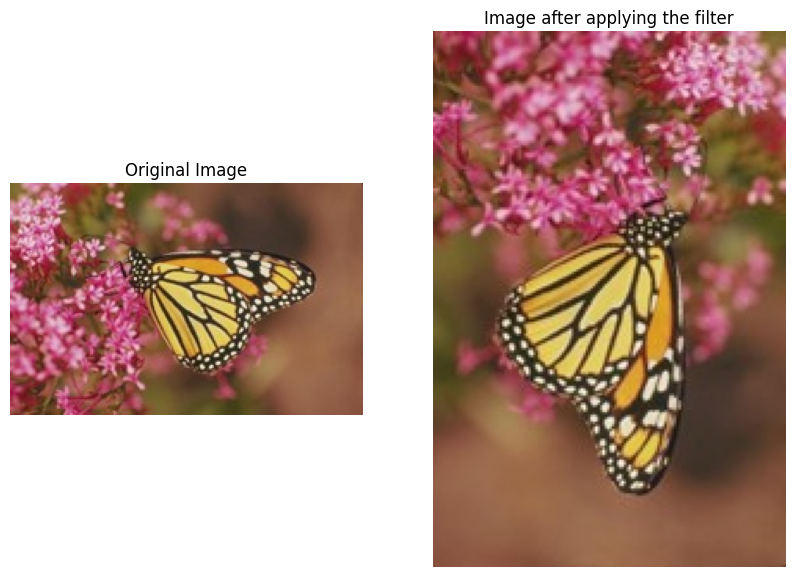

In [186]:
img_a_rotate = cv2.rotate(img_a, cv2.ROTATE_90_CLOCKWISE)
img_b_rotate = cv2.rotate(img_b, cv2.ROTATE_90_CLOCKWISE)

showBeforeAfter(img_a, img_a_rotate)
showBeforeAfter(img_b, img_b_rotate)

Soal 2C ( Operasi Flipping )

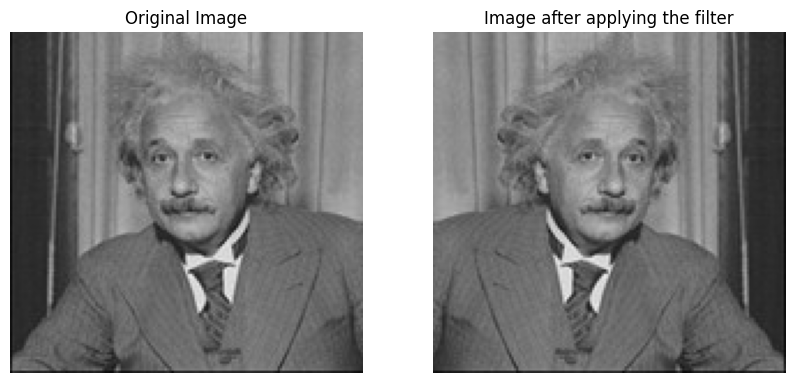

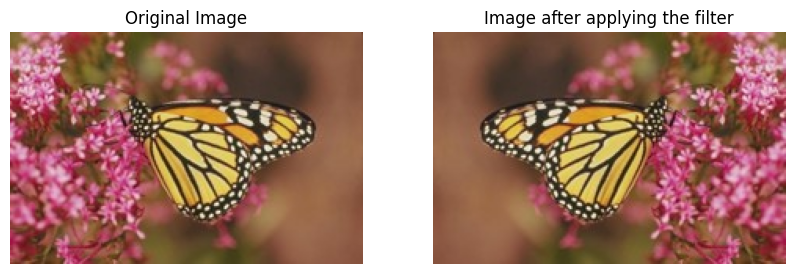

In [187]:
img_a_flip = cv2.flip(img_a, 1)
img_b_flip = cv2.flip(img_b, 1)

showBeforeAfter(img_a, img_a_flip)
showBeforeAfter(img_b, img_b_flip)

Soal 2D ( Contrast Stretching )

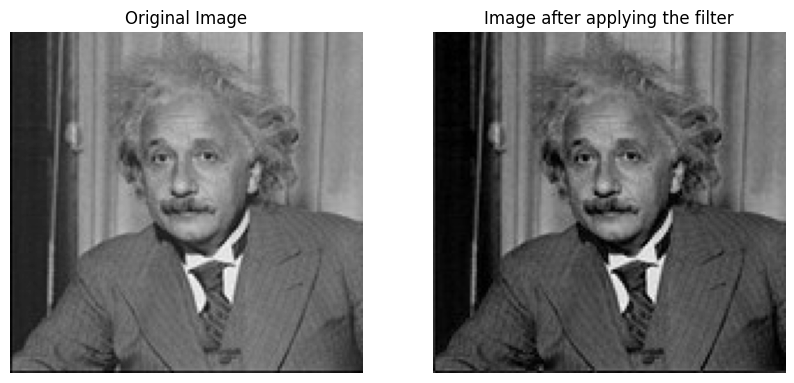

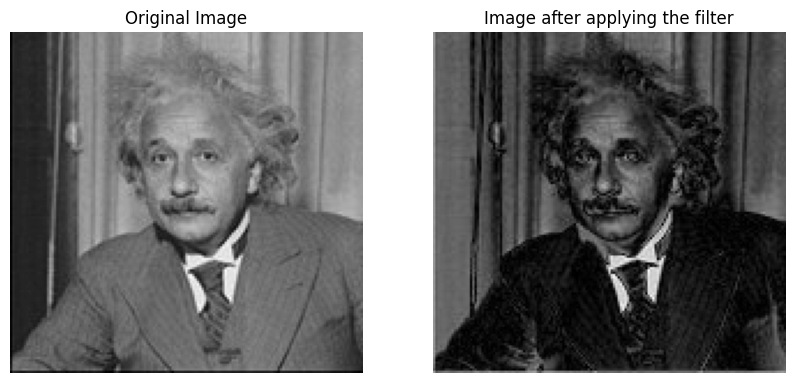

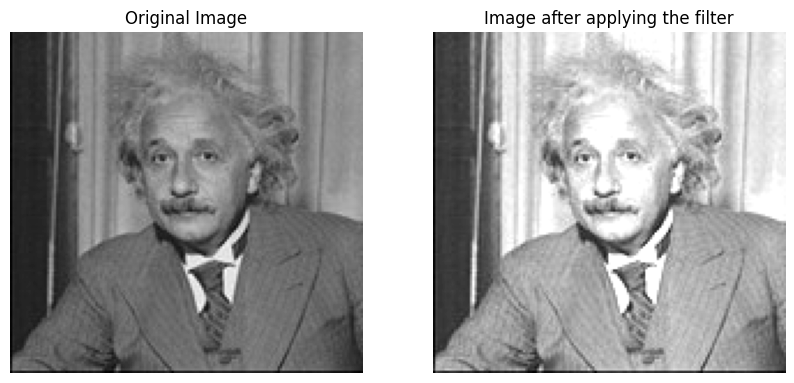

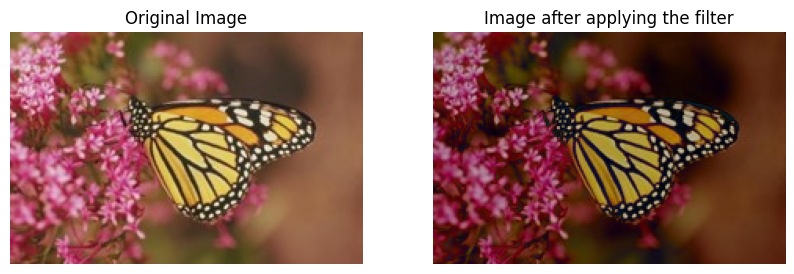

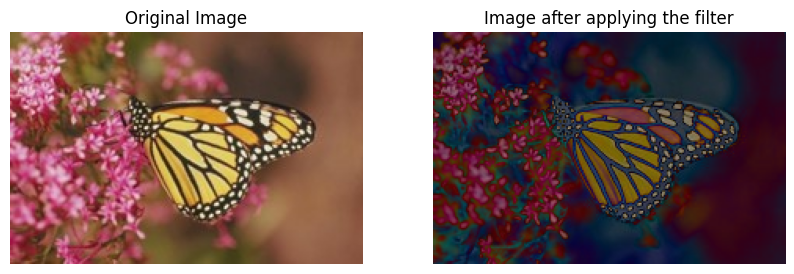

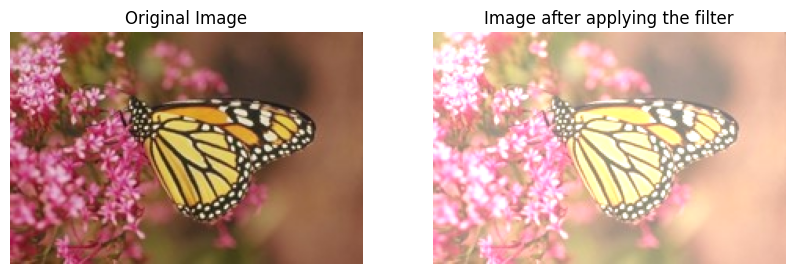

In [204]:
img_a_low_contrast = cv2.convertScaleAbs(img_a, alpha=1, beta=-50)
img_a_dark_contrast = cv2.convertScaleAbs(img_a, alpha=1, beta=-100)
img_a_high_contrast = cv2.convertScaleAbs(img_a, alpha=1, beta=100)
img_b_low_contrast = cv2.convertScaleAbs(img_b, alpha=1, beta=-50)
img_b_dark_contrast = cv2.convertScaleAbs(img_b, alpha=1, beta=-100)
img_b_high_contrast = cv2.convertScaleAbs(img_b, alpha=1, beta=100)

showBeforeAfter(img_a, img_a_low_contrast)
showBeforeAfter(img_a, img_a_dark_contrast)
showBeforeAfter(img_a, img_a_high_contrast)
showBeforeAfter(img_b, img_b_low_contrast)
showBeforeAfter(img_b, img_b_dark_contrast)
showBeforeAfter(img_b, img_b_high_contrast)